# Исследование данных и проверка гипотез в сервисе аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

* без подписки 
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;

* с подпиской Ultra 
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

**Цель проекта**:
Провести исследовательский анализ данных и проверить гипотезы, которые могут помочь сервису вырасти. 

**План проекта**

 1. Загрузка и обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Объединение данных
 5. Подсчет выручки
 6. Проверка гипотез
 7. Распределения

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
from math import sqrt
from scipy.stats import binom

#### Шаг 1. Загрузка данных

In [2]:
#считаем CSV-файл с данными о пользователях с помощью библиотеки pandas и сохраним его в датафрейм.

users_data = pd.read_csv('users_go.csv')

#выведем первые 10 строк датасета
users_data.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
#Изучим общую информацию о датафрейме

users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Видим, что в датасете нет пропущенных значений. 

In [4]:
#считаем CSV-файл с данными о поездках с помощью библиотеки pandas и сохраним его в датафрейм.
rides_data = pd.read_csv('rides_go.csv')

rides_data.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
#Изучим общую информацию о датафрейме

rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Видим, что в датасете нет пропущенных значений. 

In [6]:
#считаем CSV-файл с данными о подписках с помощью библиотеки pandas и сохраним его в датафрейм.

subscriptions_data = pd.read_csv('subscriptions_go.csv')

subscriptions_data.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
#Изучим общую информацию о датафрейме

subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Видим, что в датасете нет пропущенных значений. 

#### Шаг 2. Предобработка данных

In [8]:
# приведем данные из столбца date в датафрейме rides_data в тип datetime

rides_data['date'] = pd.to_datetime(rides_data['date'],format='%Y-%m-%d')

# проверим изменения формата в столбце
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [9]:
#добавим новый столбец с номером месяца в датафрейм rides_data

rides_data['month'] =  rides_data['date'].dt.month

#проверим изменения
rides_data.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [10]:
#проверим наличие пропущенных значений в датафреймах

print(rides_data.isna().sum())

print()

print(users_data.isna().sum())

subscriptions_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Убедились, что в датафреймах нет пропущенных значений 

In [11]:
#проверим наличие пропущенных значений в датафреймах

print(users_data.duplicated().sum())

rides_data.duplicated().sum()

31


0

In [12]:
#удалим дубликаты

users_data = users_data.drop_duplicates().reset_index(drop=True)

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:
3.1 частота встречаемости городов;
3.2 соотношение пользователей с подпиской и без подписки;
3.3 возраст пользователей;
3.4 расстояние, которое пользователь преодолел за одну поездку;
3.5 продолжительность поездок.


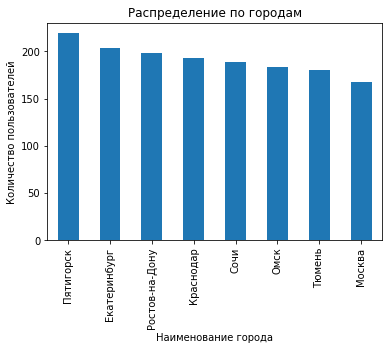

In [13]:
#визуализируем информацию о частоте встречаемости городов

users_data['city'].value_counts().plot.bar()

plt.title('Распределение по городам')
plt.xlabel('Наименование города')
plt.ylabel('Количество пользователей')
plt.show()

In [14]:
#выведем абсолютное число пользователей по городам
users_data['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Построили гистограмму по информации о городах в датасете, можно сделать вывод о том, что большее количество пользователей находятся в городе Пятигорск, второе и третье место - Екатеринбург и Ростов-на-Дону

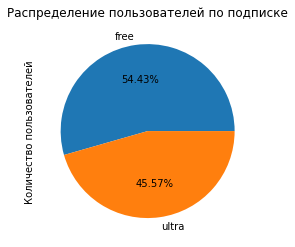

In [15]:
#визуализируем информацию о соотношении пользователей с подпиской и без подписки

users_data['subscription_type'].value_counts().plot.pie(autopct='%.2f%%')

plt.title('Распределение пользователей по подписке')
plt.ylabel('Количество пользователей')
plt.show()

Построили круговую диаграмму по информации о наличии платной подписки, можно сделать вывод, что пользователей без подписки примерно на 10% больше, чем пользователей с подпиской. 

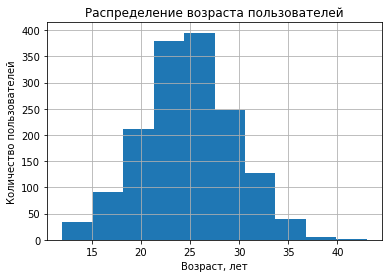

In [16]:
#визуализируем информацию о возрасте пользователей

users_data['age'].hist()

plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество пользователей')
plt.show()

Построили гистограмму по информации о возрасте пользователей. 
В среднем большее количество пользователей в категории 22-27 лет, но также встречаются и пользователи 12-15 лет и небольшая категория пользователей 37-45 лет. 

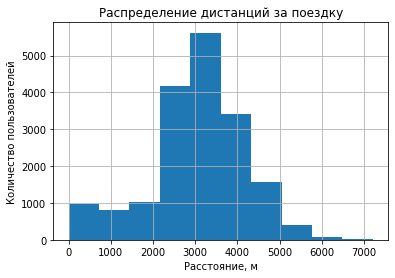

In [17]:
#визуализируем информацию о расстоянии, которое пользователь преодолел за одну поездку
rides_data['distance'].hist()

plt.title('Распределение дистанций за поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

Построили гистограмму по информации о расстоянии в поездках пользователей, видим, что в среднем за поездку преодолевают расстояние 3-3,5км, есть небольшое количество данных (около 1000 записей) с записями о поездках на расстояния менее 1км.

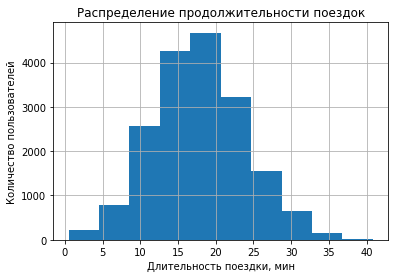

In [18]:
#визуализируем информацию о продолжительности поездок

rides_data['duration'].hist()

plt.title('Распределение продолжительности поездок')
plt.xlabel('Длительность поездки, мин')
plt.ylabel('Количество пользователей')
plt.show()

На гистограмме видим, что средняя продолжительность поездки - 16-20 минут, есть достаточно редкие записи о поездках до 5 минут и от 36 минут.

In [19]:
#выведем информацию о поездках длительностью до 1 минуты
rides_data.query('duration < 1')

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Видим, что пользователи проезжали далекие дистанции в поездках длительностью до 1 минуты - похоже на сбои логирования.

Заменим значения по длительности этих поездок, рассчитав среднюю скорость самокатов. 

In [20]:
#найдем среднюю скорость поездок
v = (rides_data['distance']/rides_data['duration']).median()

#заменим некорректные значения длительности поездок
rides_data['duration'] = rides_data['duration'].where(rides_data['duration'] > 1, rides_data['distance'] / v)

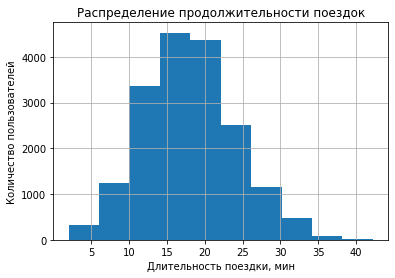

In [21]:
#построим обновленный график длительности поездок
rides_data['duration'].hist()

plt.title('Распределение продолжительности поездок')
plt.xlabel('Длительность поездки, мин')
plt.ylabel('Количество пользователей')
plt.show()

#### Шаг 4. Объединение данных

In [22]:
#объединим данные о пользователях, поездках и подписках в один датафрейм
data = users_data.merge(rides_data, on='user_id')
data = data.merge(subscriptions_data, on='subscription_type')

#выведем начало нового датафрейма
data.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [23]:
#проверим, что объем данных сохранен 
print(rides_data.shape[0])
print(data.shape[0])

#проверим, не появились ли пропуски
data.isna().sum()

18068
18068


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Объединение таблиц успешно, нет пропусков и размер соотвествует ожиданиям

In [24]:
#создадим на основе общего датафрейма датафрейм с данными о пользователях без подписки
users_free = data[data['subscription_type'] == 'free']

users_free.sort_values('distance')

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
11555,1069,Степан,20,Сочи,free,0.855683,10.001902,2021-01-31,1,8,50,0
9541,925,Всеволод,28,Ростов-на-Дону,free,2.570787,3.011018,2021-10-19,10,8,50,0
13690,1223,Злата,22,Тюмень,free,4.329506,4.008958,2021-05-22,5,8,50,0
8658,861,Мария,27,Краснодар,free,6.784447,6.015656,2021-07-21,7,8,50,0
7841,796,Алексей,25,Екатеринбург,free,7.097072,10.026614,2021-11-26,11,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17242,1477,Ян,17,Сочи,free,6724.932981,39.361103,2021-01-12,1,8,50,0
17171,1471,Роман,21,Краснодар,free,6760.940067,32.043760,2021-08-03,8,8,50,0
15580,1361,Тамерлан,21,Екатеринбург,free,6908.491343,23.816983,2021-03-27,3,8,50,0
16484,1422,Светлана,33,Тюмень,free,7066.003772,23.619318,2021-02-12,2,8,50,0


In [25]:
#создадим на основе общего датафрейма датафрейм с данными о пользователях с подпиской
users_ultra = data[data['subscription_type'] == 'ultra']

users_ultra 

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

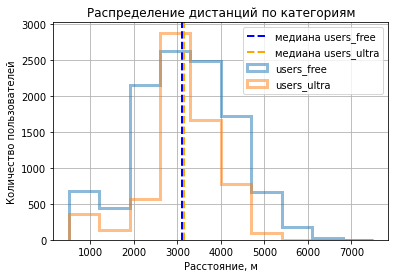

In [43]:
ax = users_free.plot(kind='hist', y='distance', histtype='step', range=(500, 7500), bins=10,
                              linewidth=3, alpha=0.5, label='free')
users_ultra.plot(kind='hist', y='distance', histtype='step', range=(500, 7500), bins=10,
                       linewidth=3, alpha=0.5, label='ultra', 
                 ax=ax, grid=True, legend=True)

plt.title('Распределение дистанций по категориям')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.axvline(x=np.median(users_free['distance']), linewidth=2, linestyle='--', color='blue')
plt.axvline(x=np.median(users_ultra['distance']), linewidth=2, linestyle='--', color='orange')
plt.legend(('медиана users_free', 'медиана users_ultra', 'users_free', 'users_ultra'))
plt.show()

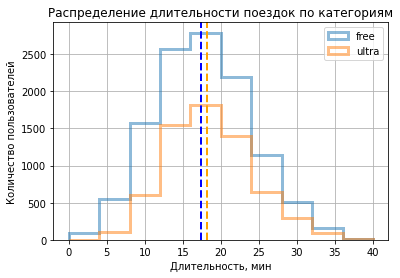

In [27]:
ax = users_free.plot(kind='hist', y='duration', histtype='step', range=(0, 40), bins=10,
                              linewidth=3, alpha=0.5, label='free')
users_ultra.plot(kind='hist', y='duration', histtype='step', range=(0, 40), bins=10,
                       linewidth=3, alpha=0.5, label='ultra', 
                 ax=ax, grid=True, legend=True)

plt.title('Распределение длительности поездок по категориям')
plt.xlabel('Длительность, мин')
plt.ylabel('Количество пользователей')
plt.axvline(x=np.median(users_free['duration']), linewidth=2, linestyle='--', color='blue')
plt.axvline(x=np.median(users_ultra['duration']), linewidth=2, linestyle='--', color='orange')
plt.show()

Медианное расстояние пользователей с подпиской и без примерно одинаково и составляет 3,1-3,2км. 
Медианное время поездки пользователей с подпиской и без примерно одинаково и составляет 17-18 минут. 

#### Шаг 5. Подсчёт выручки

In [28]:
#Создадим датафрейм с агрегированными данными о поездках

#для подсчета стоимости округлим продолжительность поездок до целых минут
data['duration'] = np.ceil(data['duration']) 

#создаем сводную таблицу
data_pivot = data.pivot_table(index=['month', 
                                     'user_id'], 
                              values=['distance',
                                      'duration', 
                                      'subscription_fee', 
                                      'start_ride_price', 
                                      'minute_price'], 
                              aggfunc={'distance':'sum', 
                                       'duration':['sum', 'count'], 
                                       'subscription_fee': 'mean', 
                                       'start_ride_price': 'mean',
                                       'minute_price': 'mean'
                                      })
#переименовываем столбцы
data_pivot.columns = ['суммарное_расстояние', 
                      'количество_поездок', 
                      'суммарное_время', 
                      'стоимость_минуты', 
                      'стоимость_начала_поездки', 
                      'стоимость_подписки']

#выведем начало таблицы
data_pivot.head(20)

суммарное_расстояние  количество_поездок  суммарное_время  \
month user_id                                                              
1     1                 7027.511294                   2             42.0   
      3                 3061.777147                   1             13.0   
      5                 3914.646990                   1             13.0   
      7                 6478.080979                   2             28.0   
      12                3577.151148                   1             33.0   
      13                6687.987446                   2             42.0   
      14                7699.643820                   2             35.0   
      15                4187.621459                   1             39.0   
      20                3516.719208                   1             29.0   
      22                3058.692225                   1             13.0   
      25                3440.353053                   1             17.0   
      26                6545.964099                   2             28.0   
      30                7774.720501                   2             25.0   
      32                3734.993902                   1             25.0   
      35                9707.810053                   3             57.0   
      42                4329.769187                   1             23.0   
      43                6322.206034                   2             48.0   
      44                2944.410629                   2             19.0   
      45                3702.424319                   2             27.0   
      46                3242.092435                   1             20.0   

               стоимость_минуты  стоимость_начала_поездки  стоимость_подписки  
month user_id                                                                  
1     1                       6                         0                 199  
      3                       6                         0                 199  
      5                       6                         0                 199  
      7                       6                         0                 199  
      12                      6                         0                 199  
      13                      6                         0                 199  
      14                      6                         0                 199  
      15                      6                         0                 199  
      20                      6                         0                 199  
      22                      6                         0                 199  
      25                      6                         0                 199  
      26                      6                         0                 199  
      30                      6                         0                 199  
      32                      6                         0                 199  
      35                      6                         0                 199  
      42                      6                         0                 199  
      43                      6                         0                 199  
      44                      6                         0                 199  
      45                      6                         0                 199  
      46                      6                         0                 199

In [29]:
#добавим столбец с помесячной выручкой, которую принёс каждый пользователь
data_pivot['выручка'] = (data_pivot['стоимость_начала_поездки'] * data_pivot['количество_поездок'] 
                  + data_pivot['стоимость_минуты'] * data_pivot['суммарное_время']
                  + data_pivot['стоимость_подписки'])
#выведем начало таблицы
data_pivot.head(20)

суммарное_расстояние  количество_поездок  суммарное_время  \
month user_id                                                              
1     1                 7027.511294                   2             42.0   
      3                 3061.777147                   1             13.0   
      5                 3914.646990                   1             13.0   
      7                 6478.080979                   2             28.0   
      12                3577.151148                   1             33.0   
      13                6687.987446                   2             42.0   
      14                7699.643820                   2             35.0   
      15                4187.621459                   1             39.0   
      20                3516.719208                   1             29.0   
      22                3058.692225                   1             13.0   
      25                3440.353053                   1             17.0   
      26                6545.964099                   2             28.0   
      30                7774.720501                   2             25.0   
      32                3734.993902                   1             25.0   
      35                9707.810053                   3             57.0   
      42                4329.769187                   1             23.0   
      43                6322.206034                   2             48.0   
      44                2944.410629                   2             19.0   
      45                3702.424319                   2             27.0   
      46                3242.092435                   1             20.0   

               стоимость_минуты  стоимость_начала_поездки  стоимость_подписки  \
month user_id                                                                   
1     1                       6                         0                 199   
      3                       6                         0                 199   
      5                       6                         0                 199   
      7                       6                         0                 199   
      12                      6                         0                 199   
      13                      6                         0                 199   
      14                      6                         0                 199   
      15                      6                         0                 199   
      20                      6                         0                 199   
      22                      6                         0                 199   
      25                      6                         0                 199   
      26                      6                         0                 199   
      30                      6                         0                 199   
      32                      6                         0                 199   
      35                      6                         0                 199   
      42                      6                         0                 199   
      43                      6                         0                 199   
      44                      6                         0                 199   
      45                      6                         0                 199   
      46                      6                         0                 199   

               выручка  
month user_id           
1     1          451.0  
      3          277.0  
      5          277.0  
      7          367.0  
      12         397.0  
      13         451.0  
      14         409.0  
      15         433.0  
      20         373.0  
      22         277.0  
      25         301.0  
      26         367.0  
      30         349.0  
      32         349.0  
      35         541.0  
      42         337.0  
      43         487.0  
      44         313.0  
      45         361.0  
      46         319.0

#### Шаг 6. Проверка гипотез

Проверим гипотезу о том, тратят ли пользователи с подпиской больше времени на поездки

In [32]:
print(f'среднее первой выборки:{np.mean(users_free["duration"])}')

print(f'среднее второй выборки:{np.mean(users_ultra["duration"])}')

# задаем уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «меньше»
results = st.ttest_ind(
    users_free['duration'],
    users_ultra['duration'],
    alternative='less')

print('p-значение:', results.pvalue)

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки:17.632576846581223
среднее второй выборки:18.54198516280583
p-значение: 9.917862480986927e-23
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Можно сделать вывод, что пользователи с подпиской тратят больше времени на поездки.

Проверим гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

In [33]:
print('среднее выборки:', users_ultra['distance'].mean())

# какое расстояние не должно быть превышено
value = 3130

# задаем уровень значимости
alpha = 0.05

# проводим ttest для выборки, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_1samp(
    users_ultra['distance'],
    value,
    alternative='greater')

print('p-значение:', results.pvalue)

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее выборки: 3115.4453880370247
p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value больше заданного уровня значимости, поэтому отвергнуть нулевую гипотезу нельзя. Можно сделать вывод, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

In [34]:
#создадим датафреймы с помесячной выручкой у пользователей с подпиской и без
data_income_ultra = data_pivot.query('стоимость_подписки == 199')
data_income_free = data_pivot.query('стоимость_подписки == 0')

print(f'среднее первой выборки:{np.mean(data_income_free["выручка"])}')

print(f'среднее второй выборки:{np.mean(data_income_ultra["выручка"])}')

# задаем уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «меньше»
results = st.ttest_ind(
    data_income_free['выручка'],
    data_income_ultra['выручка'],
    alternative='less')

print('p-значение:', results.pvalue)

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки:331.9293909973522
среднее второй выборки:362.7921906022502
p-значение: 9.391432442479095e-26
Отвергаем нулевую гипотезу


#### Шаг 7. Распределения

**7.1** Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [59]:
st.binom(1160, 0.1).cdf(99) 

0.0507443655394362

<div class="alert alert-info"> <b>Комментарий студента:</b> Попробовала просчитать количество нужных промокодов с помощью биноминального распределения. Получила новый ответ - нужно разослать минимум 1160 промокодов, чтобы вероятность не выполнить план была примерно 5%. 
</div>

In [37]:
n = 1169 # количество попыток
p = 0.1 # вероятность успеха

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 100
result = distr.cdf(99)
print(result)

0.04048226246214656


Воспользовались нормальной аппроксимацией биномиального распределения. Подобрали значение минимального количества промокодов - 1169, для того, чтобы вероятность не выполнить план была примерно 5%

**7.2** Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [39]:
n = 1000000 # количество попыток
p = 0.4 # вероятность успеха

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 100
result = distr.cdf(399500)
print(result)

0.15371708296369768


Воспользовались нормальной аппроксимацией биномиального распределения. Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равна 15,4 %. 

**Общий вывод**

1) Большее количество пользователей сосредоточено в городах: Пятигорск, Екатеринбург и Ростов-на-Дону

2) Большинство пользователей - молодая группа 22-27 лет

3) В среднем пользователи используют самокаты для преодоления расстояний 3-3,5 км и по времени поездки - 16-20 минут

4) Исходное количество пользователей с подпиской меньше, чем пользователей без подписки

5) Проверили гипотезу о том, тратят ли пользователи с подпиской больше времени на поездку - гипотезу подтвердили

6) Проверили гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров (расстояние до износа самоката) - подтвердили гипотезу

7) Проверили и подтвердили гипотезу о том, что помесячная выручка пользователей с подспиской больше, чем выручка пользователей без подписки  

8) Также были рассчитаны показатели для маркетингового отдела:
* минимального количество промокодов - 1169, для того, чтобы вероятность не выполнить план (100 подписок) была примерно 5%
* вероятность того, что push-уведомление откроют не более 399,5 тыс. пользователей из рассылки в 1 млн уведомлений равна 15,4 %.